In [2]:
#Import Lib files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import io

cancer = pd.read_csv('Breast_cancer_data.csv')
cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [6]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
mean_radius        569 non-null float64
mean_texture       569 non-null float64
mean_perimeter     569 non-null float64
mean_area          569 non-null float64
mean_smoothness    569 non-null float64
diagnosis          569 non-null int64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


# EDA Part

In [8]:
cancer.duplicated().sum()

0

In [9]:
cancer.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

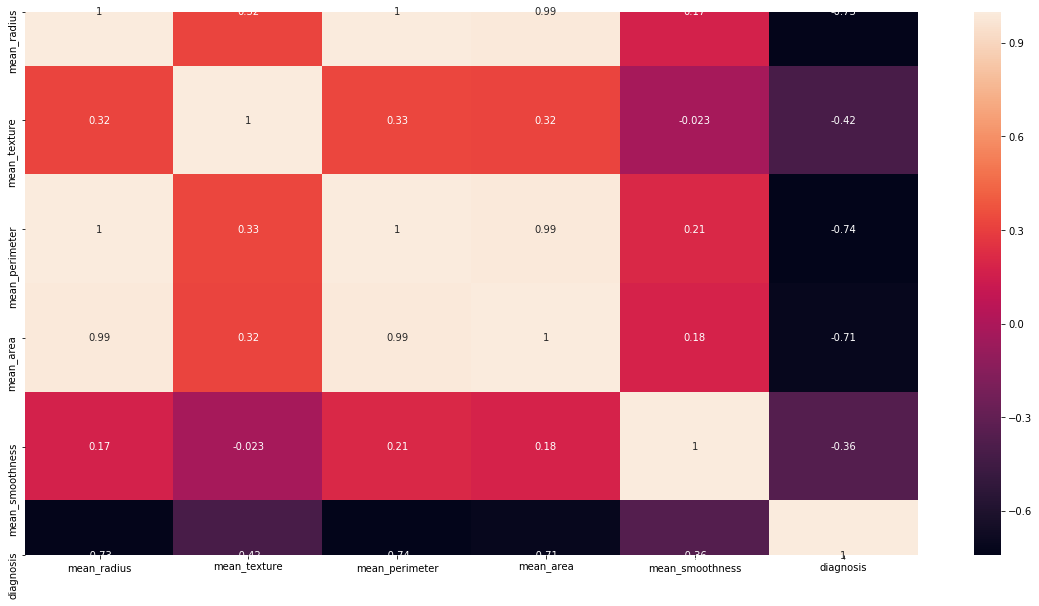

In [12]:
#Check corrrelations
import seaborn as sns
plt.figure(figsize=(20,10))

sns.heatmap(cancer.corr(),annot=True)

In [14]:
cancer.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean_radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
mean_texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
mean_perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
mean_area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
mean_smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
diagnosis,569.0,0.627417,0.483918,0.00000,0.00000,1.00000,1.0000,1.0000


In [15]:
cancer.shape

(569, 6)

# Train data

In [56]:
from sklearn.model_selection import train_test_split

X = cancer.iloc[:,0:4].values
y= cancer.iloc[:,-1].values

from sklearn.preprocessing import LabelEncoder
leb = LabelEncoder()
y = leb.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

X_test.shape

(57, 4)

# Feature scaling 

In [57]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Model Building

In [58]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [59]:

#add first input and hidden layer

classifier = Sequential()
classifier.add(Dense(3, activation='relu'))
                    
                        
#add second hidden layer
classifier.add(Dense(3, activation='relu'))

#adding output layer
classifier.add(Dense(1, activation='sigmoid'))

In [60]:
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [68]:
classifier.fit(X_train, y_train, batch_size=100, epochs=100)

Epoch 1/100
512/512 [==============================] - 0s 42us/step - loss: 0.2543 - accuracy: 0.8965
Epoch 2/100
512/512 [==============================] - 0s 30us/step - loss: 0.2543 - accuracy: 0.8965
Epoch 3/100
512/512 [==============================] - 0s 48us/step - loss: 0.2542 - accuracy: 0.8965
Epoch 4/100
512/512 [==============================] - 0s 50us/step - loss: 0.2542 - accuracy: 0.8965
Epoch 5/100
512/512 [==============================] - 0s 38us/step - loss: 0.2542 - accuracy: 0.8965
Epoch 6/100
512/512 [==============================] - 0s 36us/step - loss: 0.2542 - accuracy: 0.8965
Epoch 7/100
512/512 [==============================] - 0s 38us/step - loss: 0.2541 - accuracy: 0.8965
Epoch 8/100
512/512 [==============================] - 0s 37us/step - loss: 0.2541 - accuracy: 0.8965
Epoch 9/100
512/512 [==============================] - 0s 39us/step - loss: 0.2540 - accuracy: 0.8984
Epoch 10/100
512/512 [==============================] - 0s 43us/step - loss: 0.254

512/512 [==============================] - 0s 39us/step - loss: 0.2529 - accuracy: 0.8945
Epoch 81/100
512/512 [==============================] - 0s 30us/step - loss: 0.2529 - accuracy: 0.8945
Epoch 82/100
512/512 [==============================] - 0s 40us/step - loss: 0.2528 - accuracy: 0.8945
Epoch 83/100
512/512 [==============================] - 0s 35us/step - loss: 0.2528 - accuracy: 0.8945
Epoch 84/100
512/512 [==============================] - 0s 40us/step - loss: 0.2528 - accuracy: 0.8945
Epoch 85/100
512/512 [==============================] - 0s 37us/step - loss: 0.2527 - accuracy: 0.8945
Epoch 86/100
512/512 [==============================] - 0s 33us/step - loss: 0.2528 - accuracy: 0.8945
Epoch 87/100
512/512 [==============================] - 0s 36us/step - loss: 0.2527 - accuracy: 0.8945
Epoch 88/100
512/512 [==============================] - 0s 36us/step - loss: 0.2527 - accuracy: 0.8945
Epoch 89/100
512/512 [==============================] - 0s 31us/step - loss: 0.2527 - 

In [69]:
#Predict test result
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [70]:
#Make Confusion metrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

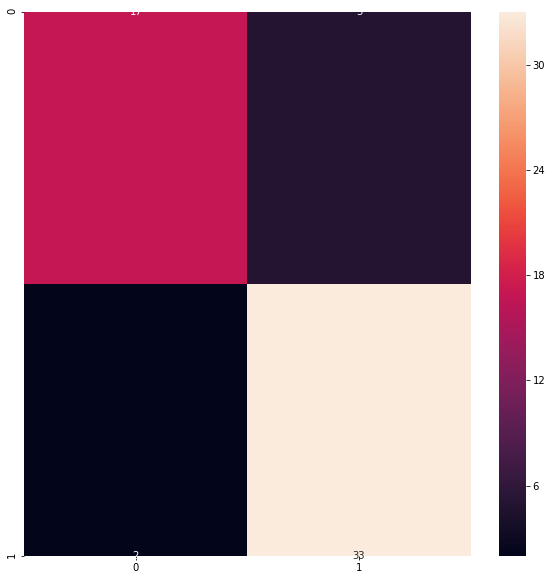

In [71]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)